MLPRegressor ~ Jyosna 

Note: reload the input data every time a new model is trained

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GroupShuffleSplit,GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score,root_mean_squared_error

In [57]:
x_train = pd.read_csv("C:\\Users\\jyosn\\Documents\\GitHub\\Predictive-Maintenance\\Datasets\\ForModelDev\\XTrain.csv")
y_train = pd.read_csv("C:\\Users\\jyosn\\Documents\\GitHub\\Predictive-Maintenance\\Datasets\\ForModelDev\\YTrain.csv")
engine = np.array(pd.read_csv("C:\\Users\\jyosn\\Documents\\GitHub\\Predictive-Maintenance\\Datasets\\ForModelDev\\Engine.csv"))
Y_train=np.asarray(y_train).ravel()
Engine=engine.ravel()

In [58]:
xtest_data = pd.read_csv('C:\\Users\\jyosn\\Documents\\GitHub\\Predictive-Maintenance\\Datasets\\ForModelDev\\XTest.csv')
ytest_data  = pd.read_csv('C:\\Users\\jyosn\\Documents\\GitHub\\Predictive-Maintenance\\Datasets\\ForModelDev\\Ytest.csv')
engine_test_data = pd.read_csv('C:\\Users\\jyosn\\Documents\\GitHub\\Predictive-Maintenance\\Datasets\\ForModelDev\\Engine_test.csv')

base model

In [4]:
gss_outer = GroupShuffleSplit(n_splits = 10, train_size = 0.7, random_state = 42) #n_splits refers to number of folds required
r2=[]
rmse=[]
for i, (train_index, val_index) in enumerate(gss_outer.split(x_train, Y_train, Engine)):
    xtrain = x_train.iloc[train_index, :] # Train Data from training set (70% split)
    ytrain = y_train.iloc[train_index, :]
    Y_train=np.asarray(ytrain).ravel()
    xval = x_train.iloc[val_index, :] # Validation Data from training set (30% split)
    yval = y_train.iloc[val_index, :]
    
    mlp = MLPRegressor(hidden_layer_sizes=(32,64,64,32),solver="lbfgs",random_state=42,activation="identity",alpha=1,learning_rate_init=0.01,max_iter=1000)
    mlp.fit(xtrain, Y_train)
    r2.append(r2_score(mlp.predict(xval), yval))
    rmse.append(root_mean_squared_error(mlp.predict(xval), yval))
print("training accuracy")
print("r2: ",np.mean(r2))
print("rmse: ",np.mean(rmse))
print("testing accuracy")
ypred = mlp.predict(xtest_data)
print('RMSE: ',np.sqrt(root_mean_squared_error(ytest_data, ypred)))
print('R2: ' ,r2_score(ytest_data, ypred))

C:\Users\jyosn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


training accuracy
r2:  0.4647502151861052
rmse:  40.688237741552555
testing accuracy
RMSE:  6.5431629639273226
R2:  0.473045770059368


    mlp = MLPRegressor(hidden_layer_sizes=(32,64,64,32),solver="lbfgs",random_state=42,activation="identity",alpha=1,
    learning_rate_init=0.01,max_iter=1000)
training accuracy

r2:  0.4647502151861052

rmse:  40.688237741552555

testing accuracy


R2:  0.473045770059368

RMSE:  6.5431629639273226


    mlp = MLPRegressor(hidden_layer_sizes=(32,64,32),solver="lbfgs",
    activation="identity",alpha=1,
    learning_rate_init=0.5,max_iter=1000)


training accuracy

r2:  0.4659602974921375

rmse:  40.65709050001117

testing accuracy

R2:  0.4731277796349267

RMSE:  6.5429083719217545

(this is the only model that i've made so far that didnt overfit!)

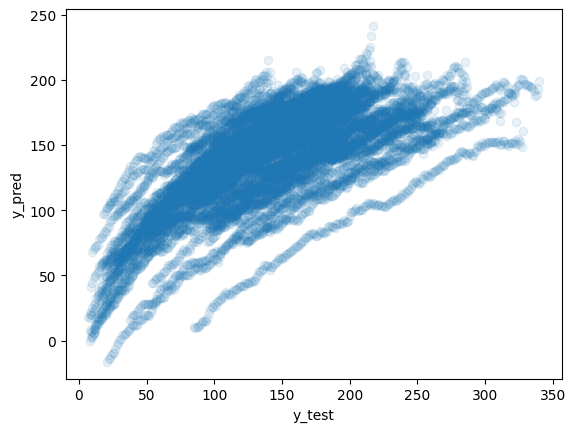

In [5]:
import matplotlib.pyplot as plt
fig=plt.figure()
plt.scatter(ytest_data,ypred,alpha=0.1,marker="o")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [13]:
gss_outer = GroupShuffleSplit(n_splits = 10, train_size = 0.7, random_state = 42) #n_splits refers to number of folds required
r2=[]
rmse=[]
for i, (train_index, val_index) in enumerate(gss_outer.split(x_train, Y_train, Engine)):
    xtrain = x_train.iloc[train_index, :] # Train Data from training set (70% split)
    ytrain = y_train.iloc[train_index, :]
    Y_train=np.asarray(ytrain).ravel()
    xval = x_train.iloc[val_index, :] # Validation Data from training set (30% split)
    yval = y_train.iloc[val_index, :]
    
    mlp = MLPRegressor(hidden_layer_sizes=(32,64,64,32,16),solver="lbfgs",random_state=42,activation="identity",alpha=1,learning_rate_init=0.01,max_iter=5000)
    mlp.fit(xtrain, Y_train)
    r2.append(r2_score(mlp.predict(xval), yval))
    rmse.append(root_mean_squared_error(mlp.predict(xval), yval))
print("training accuracy")
print("r2: ",np.mean(r2))
print("rmse: ",np.mean(rmse))
print("testing accuracy")
ypred = mlp.predict(xtest_data)
print('RMSE: ',np.sqrt(root_mean_squared_error(ytest_data, ypred)))
print('R2: ' ,r2_score(ytest_data, ypred))

training accuracy
r2:  0.4649584436801346
rmse:  40.68612880473459
testing accuracy
RMSE:  6.544618976473046
R2:  0.47257657306072065


    mlp = MLPRegressor(hidden_layer_sizes=(32,64,64,32,16),solver="lbfgs",
    random_state=42,activation="identity",
    alpha=1,learning_rate_init=0.01,max_iter=5000)

training accuracy

r2:  0.4649584436801346

rmse:  40.68612880473459

testing accuracy

R2:  0.47257657306072065

RMSE:  6.544618976473046


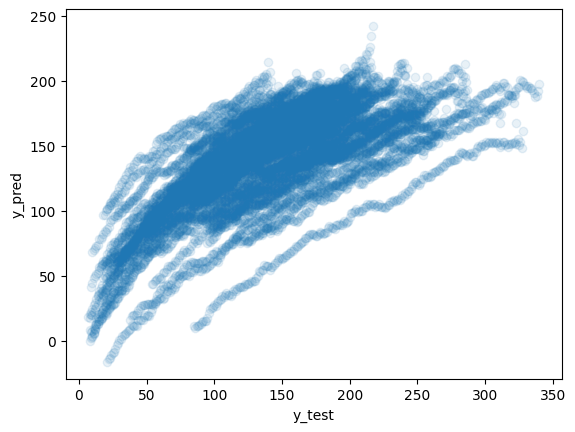

In [14]:
import matplotlib.pyplot as plt
fig=plt.figure()
plt.scatter(ytest_data,ypred,alpha=0.1,marker="o")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [17]:
gss_outer = GroupShuffleSplit(n_splits = 10, train_size = 0.7, random_state = 42) #n_splits refers to number of folds required
r2=[]
rmse=[]
for i, (train_index, val_index) in enumerate(gss_outer.split(x_train, Y_train, Engine)):
    xtrain = x_train.iloc[train_index, :] # Train Data from training set (70% split)
    ytrain = y_train.iloc[train_index, :]
    Y_train=np.asarray(ytrain).ravel()
    xval = x_train.iloc[val_index, :] # Validation Data from training set (30% split)
    yval = y_train.iloc[val_index, :]
    
    mlp = MLPRegressor(hidden_layer_sizes=(32,64,64,32,16),solver="lbfgs",random_state=42,activation="identity",alpha=2,learning_rate_init=0.01,max_iter=5000)
    mlp.fit(xtrain, Y_train)
    r2.append(r2_score(mlp.predict(xval), yval))
    rmse.append(root_mean_squared_error(mlp.predict(xval), yval))
print("training accuracy")
print("r2: ",np.mean(r2))
print("rmse: ",np.mean(rmse))
print("testing accuracy")
ypred = mlp.predict(xtest_data)
print('RMSE: ',np.sqrt(root_mean_squared_error(ytest_data, ypred)))
print('R2: ' ,r2_score(ytest_data, ypred))

training accuracy
r2:  0.46524741471461944
rmse:  40.68904973181096
testing accuracy
RMSE:  6.543630583664919
R2:  0.4728951147160452


    mlp = MLPRegressor(hidden_layer_sizes=(32,64,64,32,16),solver="lbfgs",
    random_state=42,activation="identity",
    alpha=2,learning_rate_init=0.01,
    max_iter=5000)

training accuracy

r2:  0.46524741471461944

rmse:  40.68904973181096

testing accuracy


R2:  0.4728951147160452

RMSE:  6.543630583664919


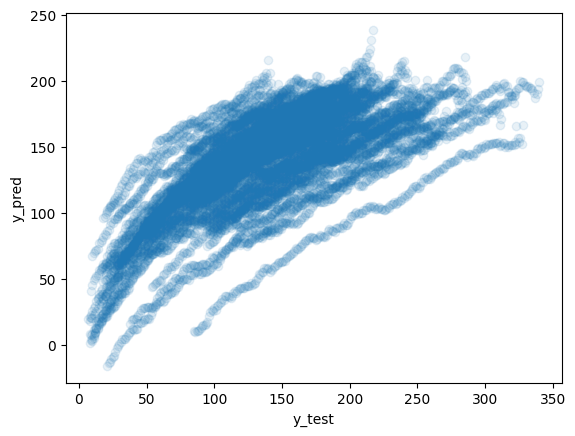

In [18]:
import matplotlib.pyplot as plt
fig=plt.figure()
plt.scatter(ytest_data,ypred,alpha=0.1,marker="o")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [28]:
gss_outer = GroupShuffleSplit(n_splits = 10, train_size = 0.7, random_state = 42) #n_splits refers to number of folds required
r2=[]
rmse=[]
for i, (train_index, val_index) in enumerate(gss_outer.split(x_train, Y_train, Engine)):
    xtrain = x_train.iloc[train_index, :] # Train Data from training set (70% split)
    ytrain = y_train.iloc[train_index, :]
    Y_train=np.asarray(ytrain).ravel()
    xval = x_train.iloc[val_index, :] # Validation Data from training set (30% split)
    yval = y_train.iloc[val_index, :]
    
    mlp = MLPRegressor(hidden_layer_sizes=(16,32,64,64,32,16),solver="lbfgs",random_state=42,activation="identity",alpha=2,learning_rate_init=0.01,max_iter=5000)
    mlp.fit(xtrain, Y_train)
    r2.append(r2_score(mlp.predict(xval), yval))
    rmse.append(root_mean_squared_error(mlp.predict(xval), yval))
print("training accuracy")
print("r2: ",np.mean(r2))
print("rmse: ",np.mean(rmse))
print("testing accuracy")
ypred = mlp.predict(xtest_data)
print('RMSE: ',np.sqrt(root_mean_squared_error(ytest_data, ypred)))
print('R2: ' ,r2_score(ytest_data, ypred))

training accuracy
r2:  0.4666734057392271
rmse:  40.61930770324939
testing accuracy
RMSE:  6.541037654483816
R2:  0.47373008452148


    mlp = MLPRegressor(hidden_layer_sizes=(32,64,64,32,16),solver="adam",
    random_state=42,activation="identity",alpha=2,
    learning_rate_init=0.01,max_iter=5000)

training accuracy

r2:  0.4666734057392271

rmse:  40.61930770324939

testing accuracy

RMSE:  6.541037654483816

R2:  0.47373008452148


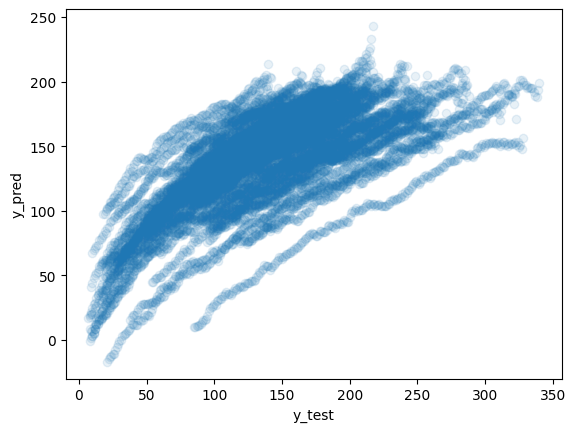

In [31]:
import matplotlib.pyplot as plt
fig=plt.figure()
plt.scatter(ytest_data,ypred,alpha=0.1,marker="o")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [32]:
gss_outer = GroupShuffleSplit(n_splits = 10, train_size = 0.7, random_state = 42) #n_splits refers to number of folds required
r2=[]
rmse=[]
for i, (train_index, val_index) in enumerate(gss_outer.split(x_train, Y_train, Engine)):
    xtrain = x_train.iloc[train_index, :] # Train Data from training set (70% split)
    ytrain = y_train.iloc[train_index, :]
    Y_train=np.asarray(ytrain).ravel()
    xval = x_train.iloc[val_index, :] # Validation Data from training set (30% split)
    yval = y_train.iloc[val_index, :]
    
    mlp = MLPRegressor(hidden_layer_sizes=(8,16,32,64,32,8),solver="lbfgs",random_state=42,activation="identity",alpha=2,learning_rate_init=0.01,max_iter=5000)
    mlp.fit(xtrain, Y_train)
    r2.append(r2_score(mlp.predict(xval), yval))
    rmse.append(root_mean_squared_error(mlp.predict(xval), yval))
print("training accuracy")
print("r2: ",np.mean(r2))
print("rmse: ",np.mean(rmse))
print("testing accuracy")
ypred = mlp.predict(xtest_data)
print('RMSE: ',np.sqrt(root_mean_squared_error(ytest_data, ypred)))
print('R2: ' ,r2_score(ytest_data, ypred))

training accuracy
r2:  0.46455828285496265
rmse:  40.684917549796246
testing accuracy
RMSE:  6.543028658630231
R2:  0.473089033885012


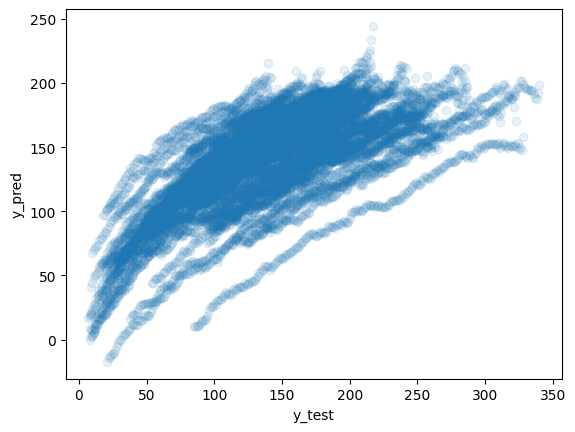

In [33]:

fig=plt.figure()
plt.scatter(ytest_data,ypred,alpha=0.1,marker="o")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

Residual analysis

In [40]:
y_test=np.asarray(ytest_data).ravel()

In [38]:
ypred.shape

(13096,)

Text(0, 0.5, 'resid')

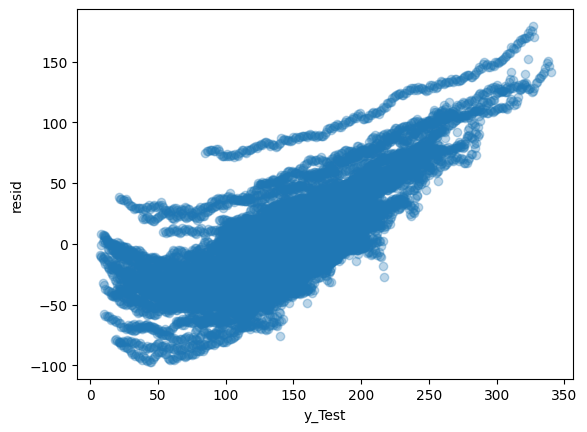

In [45]:
resid=np.subtract(y_test,ypred)
fig=plt.figure()
plt.scatter(y_test,resid,alpha=0.3,marker="o")
plt.xlabel("y_Test")
plt.ylabel("resid")

heteroscedasticity and non normality detected